In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
## summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
## checking columns
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Data Check to perform

* check Missing value<br>
* check duplicate value<br>
* check data types<br>
* check the no of unique value of each columns<br>
* check statistics of dataset<br>
* check various categories present in different categorical columns<br>

In [7]:
## check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
## check duplicate values
df.duplicated().sum()

0

In [9]:
## checking datatypes of columns
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
## no of unique values in each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
## describe the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [14]:
## separating categorical and numerical columns
categorical_feature = df.dtypes[df.dtypes == 'object'].index
numerical_feature = df.dtypes[df.dtypes == 'int'].index

In [15]:
categorical_feature

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [16]:
numerical_feature

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [17]:
## checking different values of each categorical columns
for i in categorical_feature:
    print(df[i].value_counts(),'\n')

female    518
male      482
Name: gender, dtype: int64 

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 

standard        645
free/reduced    355
Name: lunch, dtype: int64 

none         642
completed    358
Name: test preparation course, dtype: int64 



In [18]:
numerical_feature

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [19]:
## creating total_marks and average_marks columns
df['total_marks'] = df['math score']+ df['reading score']+ df['writing score']
df['average_marks'] = df['total_marks']/3

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='average_marks', ylabel='Count'>

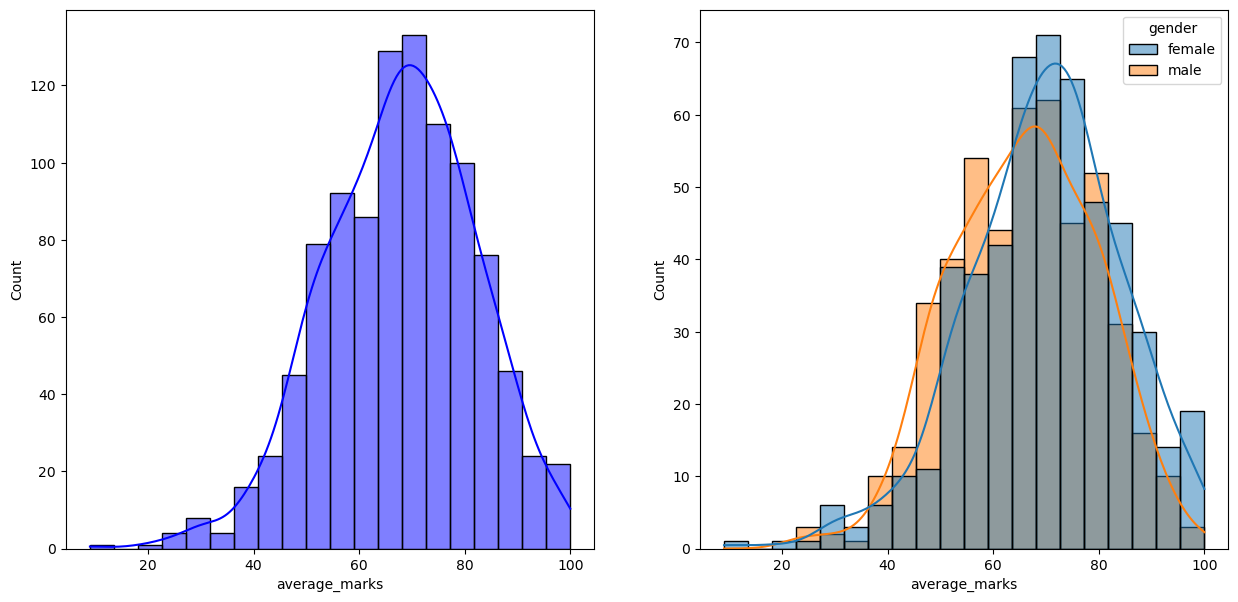

In [21]:
## Data Visualization
fig = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
## average marks 
sns.histplot(data = df,x = df.average_marks,bins = 20,kde = True,color = 'blue')
## average marks by gender
plt.subplot(122)
sns.histplot(data=df,x=df.average_marks,bins=20,kde=True,hue=df.gender)

<AxesSubplot: xlabel='average_marks', ylabel='Count'>

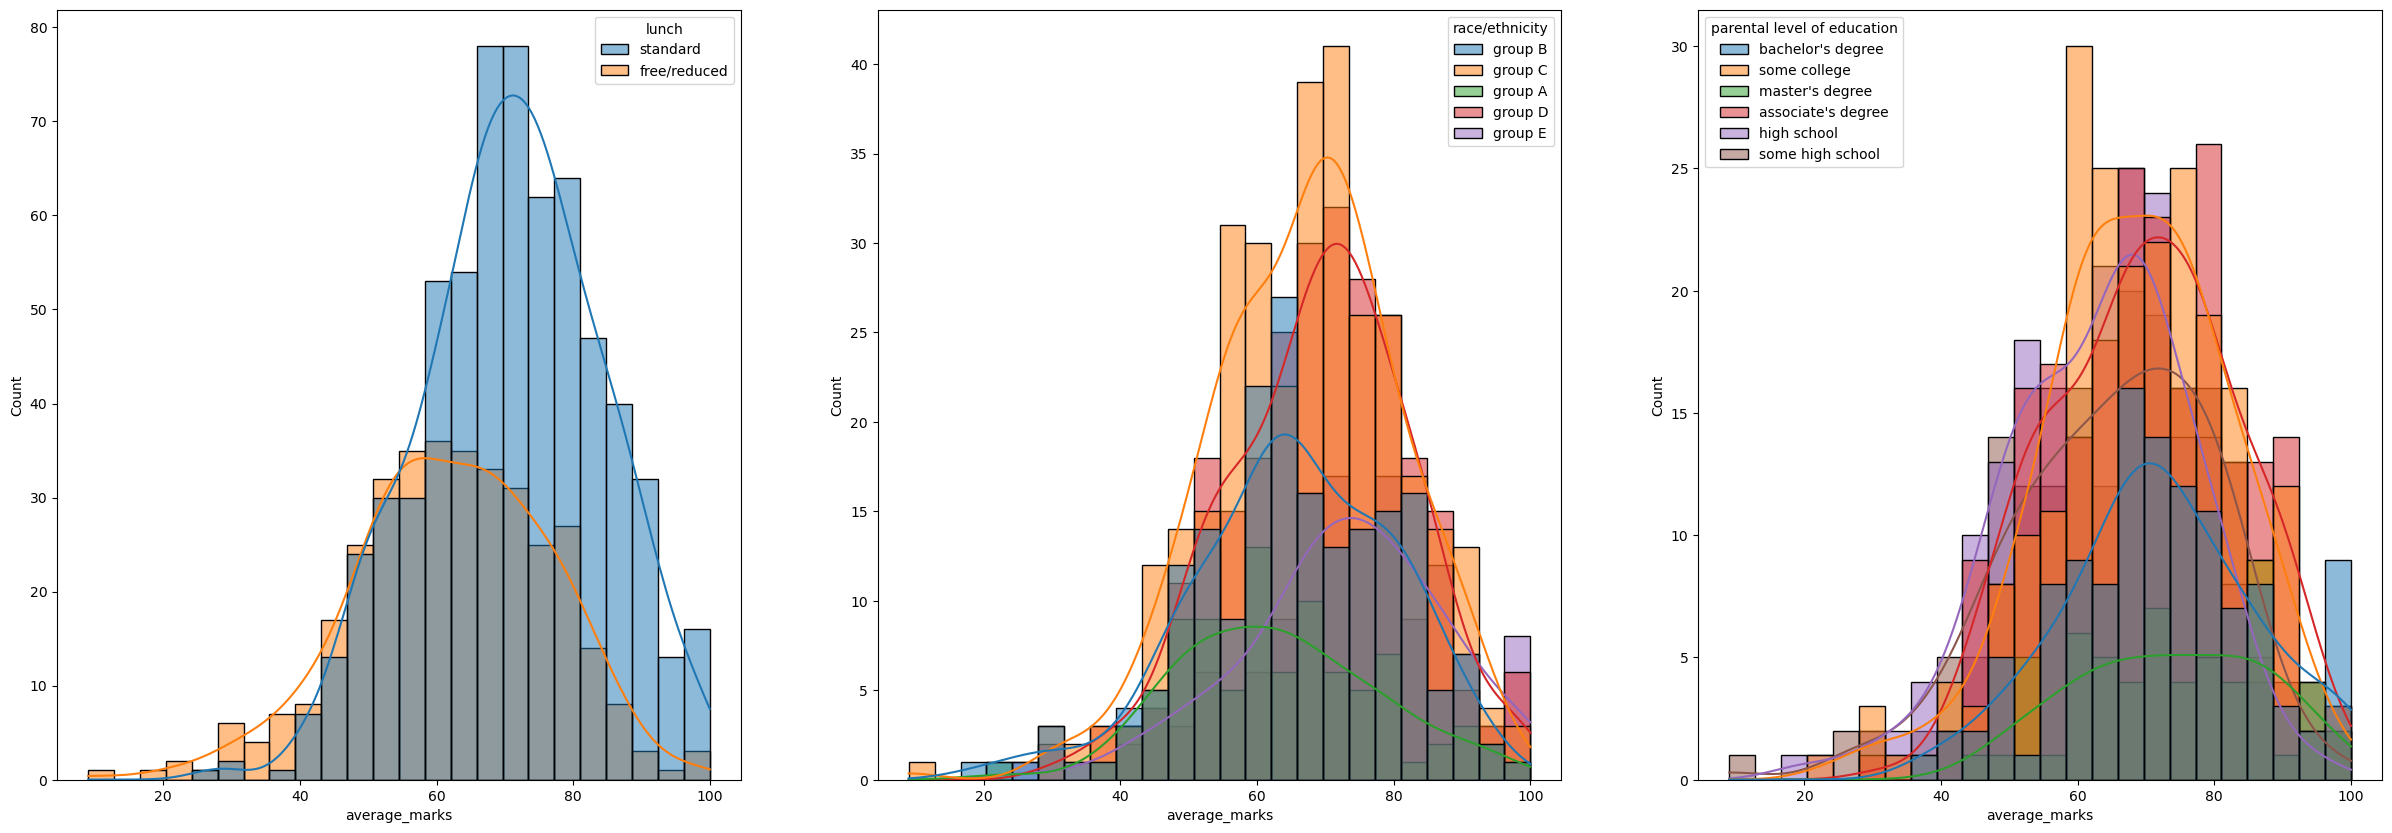

In [22]:
fig = plt.subplots(1,3,figsize=(30,10))

## average marks related to lunch
plt.subplot(131)
sns.histplot(data=df,x=df.average_marks,kde=True,hue=df.lunch)

## average marks related to race/ethnicity	
plt.subplot(132)
sns.histplot(data=df,x=df.average_marks,kde=True,hue=df['race/ethnicity'])

## average marks related to parental level of education	
plt.subplot(133)
sns.histplot(data=df,x=df.average_marks,kde=True,hue=df['parental level of education'])


<AxesSubplot: xlabel='average_marks', ylabel='Count'>

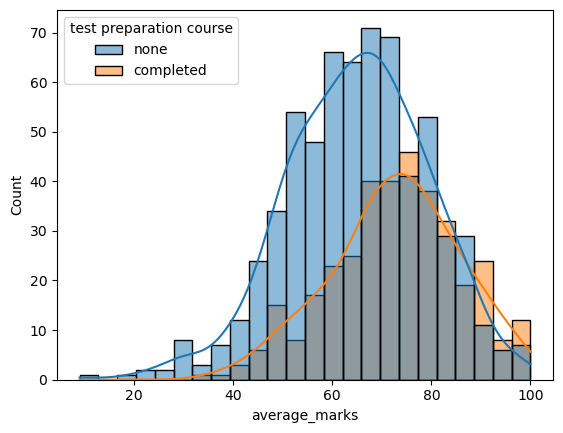

In [23]:
sns.histplot(data=df,x=df.average_marks,kde=True,hue='test preparation course')

/tmp/ipykernel_1575/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

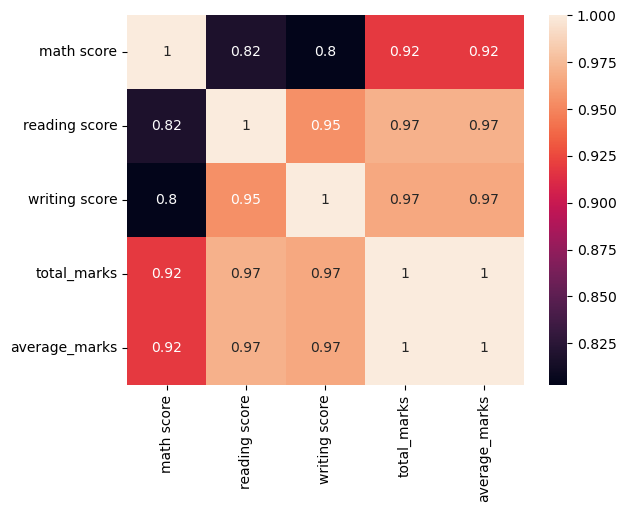

In [24]:
sns.heatmap(df.corr(),annot=True)